In [1]:
import pandas as pd

In [4]:
df1 = pd.read_csv("dataset/store_member_total_1.csv")

In [5]:
def func1(row):
    return row

In [7]:
df1["주소"]

0       서울 강북구 미아동 134-
1        경기 용인시 수지구 동천동
2        경기 용인시 수지구 동천동
3        경기 용인시 수지구 성복동
4        경기 용인시 수지구 동천동
             ...       
4280     경기 성남시 분당구 판교동
4281    서울 관악구 행운동 1681
4282     경기 성남시 분당구 백현동
4283    서울 용산구 한남동 737-
4284     경기 수원시 영통구 이의동
Name: 주소, Length: 4285, dtype: object

In [10]:
# row라는 이름으로 한줄씩 들어간다. 
df1["주소"].apply(func1)

0       서울 강북구 미아동 134-
1        경기 용인시 수지구 동천동
2        경기 용인시 수지구 동천동
3        경기 용인시 수지구 성복동
4        경기 용인시 수지구 동천동
             ...       
4280     경기 성남시 분당구 판교동
4281    서울 관악구 행운동 1681
4282     경기 성남시 분당구 백현동
4283    서울 용산구 한남동 737-
4284     경기 수원시 영통구 이의동
Name: 주소, Length: 4285, dtype: object

In [12]:
# 긴 세부 주소에서 앞에 두 글자만
# 앞에 있는 두 글자만 추출하는 로직을 만들어보자
def func1(row):
    result = row[0:2]
    return result

In [13]:
df1["주소"].apply(func1)

0       서울
1       경기
2       경기
3       경기
4       경기
        ..
4280    경기
4281    서울
4282    경기
4283    서울
4284    경기
Name: 주소, Length: 4285, dtype: object

In [14]:
df1["주소(apply1)"] = df1["주소"].apply(func1)

In [17]:
df1["주소(apply1)"].unique()

array(['서울', '경기', '인천', '충북', '강원', '경남', '대전', '전북', '광주', '경북', '세종',
       '충남', '제주', '대구', '울산', '전남'], dtype=object)

In [20]:
# 어느 지역 거주자가 경기도 용인시에 위치한 우리 매장에 가장 많이 방문했는가? 
# 빈도
df1["주소(apply1)"].value_counts()

경기    3323
서울     754
강원      42
대전      28
인천      24
충남      23
경남      16
충북      14
경북      14
제주      13
세종      10
광주       8
전북       7
대구       5
울산       2
전남       2
Name: 주소(apply1), dtype: int64

In [22]:
import seaborn as sns
import matplotlib as mpl
mpl.rc("font", family="Malgun Gothic")
import matplotlib.pyplot as plt

<Axes: xlabel='주소(apply1)', ylabel='count'>

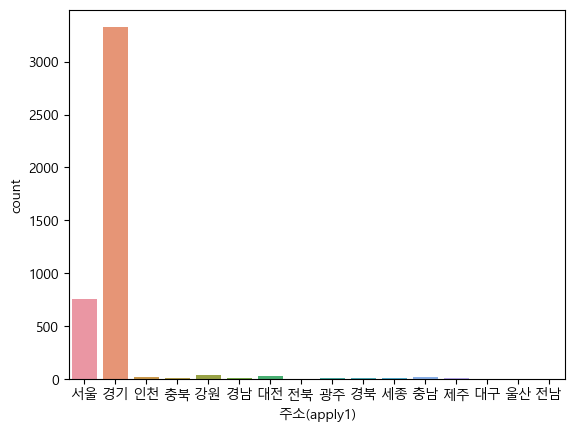

In [23]:
# 빈도수를 시각화하는 countplot
# 주소별 인원수 출력
sns.countplot(data=df1, x="주소(apply1)")

In [25]:
# 생년 이용해서 연령을 계산하고 연령대를 구해보자
df1["생년"]

0       1967.0
1       1947.0
2       1972.0
3       1969.0
4       1948.0
         ...  
4280    1963.0
4281    1982.0
4282    1975.0
4283    1961.0
4284    1971.0
Name: 생년, Length: 4285, dtype: float64

In [27]:
df1["연령"] = 2021 - df1["생년"]

In [28]:
df1["연령"]

0       54.0
1       74.0
2       49.0
3       52.0
4       73.0
        ... 
4280    58.0
4281    39.0
4282    46.0
4283    60.0
4284    50.0
Name: 연령, Length: 4285, dtype: float64

In [30]:
# descirbe 사용해서 분포 확인하기
# 이상치 있음. 
# 이상치 제거하고 연령대 처리해보자. 
df1["연령"].describe()

count      4283.000000
mean          9.032921
std        3025.409511
min     -197916.000000
25%          44.000000
50%          52.000000
75%          63.000000
max        1828.000000
Name: 연령, dtype: float64

In [33]:
import numpy as np

In [34]:
cond1 = (df1["연령"] > 0 )
cond2 = (df1["연령"] < 100)

df1.loc[cond1& cond2, "연령(clean)"] = df1["연령"] # 정상 연령
df1.loc[~cond1&cond2, "연령(clean)"] = np.nan # 이상 연령

In [37]:
# 연령 이상치 제거 여부 확인: 26-98
df1["연령(clean)"].describe()

count    4277.000000
mean       53.988543
std        12.820361
min        26.000000
25%        44.000000
50%        52.000000
75%        63.000000
max        98.000000
Name: 연령(clean), dtype: float64

<Axes: xlabel='연령(clean)', ylabel='Count'>

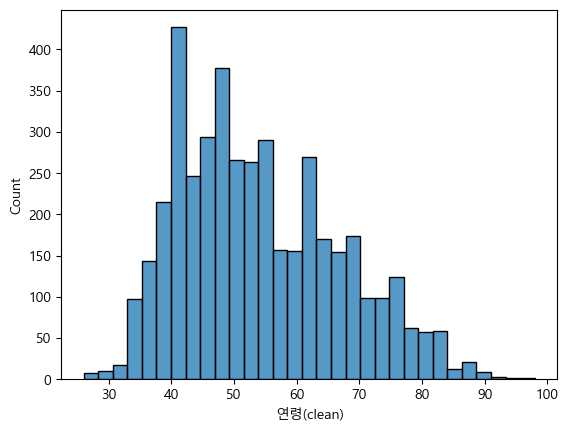

In [38]:
# 데이터 분포 확인
sns.histplot(data=df1, x="연령(clean)")

In [40]:
# apply 사용해서 연령을 연령대로 만들자
# apply 함수 사용할 때는 일단 apply 함수가 정상적으로 작동하는지 다음과 같이 확인한다: 
# 연령을 연령대로 바꾸는 로직
def func2(row):
    return row

In [45]:
def func2(row):
    return row % 10

In [47]:
# if block으로 구성할 경우, 최소연령이 26, 최대연령이 96이었다는 점을 고려해서 90대부터 20대까지 처리한다.
def func2(row):
    if row >=90:
        return "90대"
    elif row >=80:
        return "80대"
    elif row >=70:
        return "80대"
    elif row >=60:
        return "60대"
    elif row >=50:
        return "50대"
    elif row >=40:
        return "40대"
    elif row >=30:
        return "30대"
    return "20대"

In [48]:
df1["연령(clean)"].apply(func2)

0       50대
1       80대
2       40대
3       50대
4       80대
       ... 
4280    50대
4281    30대
4282    40대
4283    60대
4284    50대
Name: 연령(clean), Length: 4285, dtype: object

In [49]:
df1["연령대"] = df1["연령(clean)"].apply(func2)

In [50]:
# 연령대 수치적 확인
df1["연령대"].value_counts()

40대    1345
50대    1062
60대     798
80대     574
30대     478
20대      19
90대       9
Name: 연령대, dtype: int64

<Axes: xlabel='연령대', ylabel='count'>

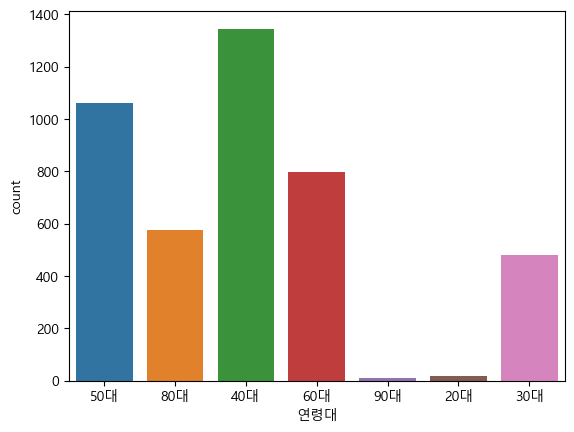

In [51]:
# 어느 연령대가 가장 많이 이용했는가? 
sns.countplot(data=df1, x="연령대")

In [71]:
# if block을 사용한 func2는 너무 복잡하다. 
# 더 쉬운 방법은 없을까?
def func3(row):
    result = str(row)
    return result[0] + "0대"

In [72]:
df1["연령(clean)"].apply(func3)

0       50대
1       70대
2       40대
3       50대
4       70대
       ... 
4280    50대
4281    30대
4282    40대
4283    60대
4284    50대
Name: 연령(clean), Length: 4285, dtype: object

In [73]:
# apply 함수는 파이썬 기초를 탄탄하게 하고 왔어야 유용하게 사용할 수 있다. 
# 내가 원하는 수식과 로직에 따라서 데이터를 처리하고 분석하고자 할 때, apply함수를 사용한다. 
# pandas에 내가 원하는 기능을 하는 함수가 있는데 기억이 나지 않을 떄도, apply 함수를 사용할 수 있다.

In [74]:
df1["연령대"] = df1["연령(clean)"].apply(func3)

In [76]:
# n0대는 결측치이다. 
df1["연령대"].value_counts()

40대    1345
50대    1062
60대     798
30대     478
70대     421
80대     153
20대      11
90대       9
n0대       8
Name: 연령대, dtype: int64

In [84]:
def func3(row):
    # row 값에 결측값이 있다면 pass
    # 결측치는 결측치로 그대로 냅두는 로직
    # 결측값은 그대로 결측값으로 처리?
    if pd.isnull(row):
        return row
    # 결측값이 아니면 절차 수행
    else:
        result = str(row)
        return result[0] + "0대"

In [85]:
df1["연령(clean)"].apply(func3)

0       50대
1       70대
2       40대
3       50대
4       70대
       ... 
4280    50대
4281    30대
4282    40대
4283    60대
4284    50대
Name: 연령(clean), Length: 4285, dtype: object

In [87]:
# 동천 or 분당 or 성북과 같이 특정 글자가 들어가 있으면 ~지역과 같이 만들어보자. 
df1["주소"]

0       서울 강북구 미아동 134-
1        경기 용인시 수지구 동천동
2        경기 용인시 수지구 동천동
3        경기 용인시 수지구 성복동
4        경기 용인시 수지구 동천동
             ...       
4280     경기 성남시 분당구 판교동
4281    서울 관악구 행운동 1681
4282     경기 성남시 분당구 백현동
4283    서울 용산구 한남동 737-
4284     경기 수원시 영통구 이의동
Name: 주소, Length: 4285, dtype: object

In [88]:
# 세부주소에서 '동천'
def func4(row):
    if "동천" in row:
        return "동천"
    else:
        return row

In [89]:
df1["주소"].apply(func4)

0       서울 강북구 미아동 134-
1                    동천
2                    동천
3        경기 용인시 수지구 성복동
4                    동천
             ...       
4280     경기 성남시 분당구 판교동
4281    서울 관악구 행운동 1681
4282     경기 성남시 분당구 백현동
4283    서울 용산구 한남동 737-
4284     경기 수원시 영통구 이의동
Name: 주소, Length: 4285, dtype: object

In [ ]:
# 텍스트 마이닝: 문자 데이터를 처리해서 데이터를 분석하는 영역

In [91]:
df1["주소(중분류)"] = df1["주소"].apply(func4)
df1["주소(중분류)"].value_counts() # 어떤 데이터가 얼만큼 처리가 됬는지 확인하면서 처리하기 위해 value_counts 사용

경기 용인시 수지구 신봉동     212
경기 용인시 수지구 풍덕천2    184
경기 용인시 수지구 성복동     180
경기 용인시 수지구 풍덕천동    175
경기 용인시 수지구 상현동     158
                  ... 
서울 동작구 상도1동 520      1
인천 중구 내동 83-5번지      1
경남 거제시 장평동 경남 거      1
경기 화성시 반송동 135번      1
서울 용산구 한남동 737-      1
Name: 주소(중분류), Length: 1274, dtype: int64

In [92]:
# 이런식으로 데이터를 봐가면서 처리해줄 수 있다. 
# 어떤 데이터가 어떻게 처리되고 있는지 보면서 처리해줄 수 있다. 
def func4(row):
    if "동천" in row:
        return "동천"
    elif '신봉' in row:
        return '신봉'
    else:
        return row
    
df1["주소(중분류)"] = df1["주소"].apply(func4)
df1["주소(중분류)"].value_counts() 

신봉                 212
경기 용인시 수지구 풍덕천2    184
경기 용인시 수지구 성복동     180
경기 용인시 수지구 풍덕천동    175
경기 용인시 수지구 상현동     158
                  ... 
서울 동작구 상도1동 520      1
인천 중구 내동 83-5번지      1
경남 거제시 장평동 경남 거      1
경기 화성시 반송동 135번      1
서울 용산구 한남동 737-      1
Name: 주소(중분류), Length: 1274, dtype: int64

In [96]:
def func4(row):
    if "동천" in row:
        return "동천"
    elif '신봉' in row:
        return '신봉'
    elif '풍덕천2' in row:
        return '풍덕천2' # 풍덕천2라는 글자가 들어가면
    elif '성복' in row:
        return '성복'
    elif '상현' in row:
        return '상현'
    elif '서울' in row:
        return '서울'
    else:
        return row
    
df1["주소(중분류)"] = df1["주소"].apply(func4)
df1["주소(중분류)"].value_counts() 

서울                 754
상현                 424
신봉                 212
풍덕천2               184
성복                 181
                  ... 
경기 안양시 만안구 안양동       1
경기 화성시 병점동 성호1차      1
경기 고양시 일산동구 장항동      1
경기 하남시 덕풍3동 참아름      1
충남 금산군 복수면 곡남리       1
Name: 주소(중분류), Length: 632, dtype: int64

In [99]:
# 주소의 unique val 개수가 너무 많아서 중간에 잘려서 나온다. (...)
# 이런 경우에는 unique 함수를 쓴다.
df1["주소(중분류)"].unique() 
# 주소가 너무 많아서 동단위로 구분하는 건 쉽지 않아 보인다. 

array(['서울', '동천', '성복', '상현', '신봉', '풍덕천2', '경기 용인시 수지구 풍덕천1',
       '경기 성남시 분당구 정자동', '인천 서구 당하동 895-1', '경기 용인시 수지구 죽전2동',
       '경기 용인시 수지구 풍덕천동', '경기 성남시 분당구 동원동', '경기 용인시 수지구 죽전1동',
       '경기 오산시 내삼미동 899', '경기 수원시 영통구 매탄3동', '경기 용인시 기흥구 보정동',
       '경기 용인시 기흥구 서천동', '경기 성남시 분당구 판교동', '경기 용인시 기흥구 신갈동',
       '경기 성남시 분당구 분당동', '경기 성남시 분당구 삼평동', '경기 수원시 영통구 하동 9',
       '경기 수원시 영통구 이의동', '경기 수원시 영통구 영통1동', '경기 성남시 중원구 하대원동',
       '경기 성남시 분당구 야탑동', '경기 성남시 분당구 구미동', '경기 부천시 오정구 고강동',
       '경기 성남시 중원구 상대원1', '경기 용인시 수지구 고기동', '경기 용인시 수지구 죽전동',
       '경기 성남시 분당구 수내2동', '경기 광명시 광명2동 98-', '경기 용인시 기흥구 구갈동',
       '충북 충주시 연수동 연수힐스', '경기 고양시 덕양구 토당동', '경기 수원시 영통구 원천동',
       '경기 용인시 기흥구 마북동', '경기 과천시 원문동 4번지', '경기 광주시 오포읍 신현리',
       '경기 성남시 분당구 서현동', '경기 용인시 기흥구 중동 어', '경기 용인시 기흥구 영덕동',
       '경기 성남시 분당구 수내동', '경기 용인시 기흥구 언남동', '경기 성남시 분당구 백현동',
       '경기 용인시 기흥구 중동 백', '경기 부천시 원미구 중동 5', '경기 수원시 권선구 구운동',
       '경기 용인시 기흥구 청덕동', '경기 양평군 양서면 양수리', '강원 원주시 반곡동 1158',
    

In [105]:
def func4(row):
    if "동천" in row:
        return "동천"
    elif '신봉' in row:
        return '신봉'
    elif '풍덕천2' in row:
        return '풍덕천2' # 풍덕천2라는 글자가 들어가면
    elif '성복' in row:
        return '성복'
    elif '상현' in row:
        return '상현'
    elif '서울' in row:
        return '서울'
    elif '수지구' in row:
        return '수지구'
    else: # 빈도수가 많지 않은 지역은 기타로 묶어버리기
         return '경기기타'
    
df1["주소(중분류)"] = df1["주소"].apply(func4)
df1["주소(중분류)"].value_counts() # 빈도수 decreaing sort 되어 있다 
# 경기기타가 너무 많다. 
# 경기기타만 데이터 추출 기법 사용해서 추가 처리를 해줘도 된다. 

경기기타    1863
서울       754
수지구      511
상현       424
신봉       212
풍덕천2     184
성복       181
동천       156
Name: 주소(중분류), dtype: int64

In [108]:
# 경기기타에서 수원, 용인, 분당와 같이 더 나누는 작업을 할 수도 있다.
cond1 = (df1["주소(중분류)"] == "경기기타")
df1.loc[cond1, "주소"]

16       경기 성남시 분당구 정자동
22      인천 서구 당하동 895-1
45       경기 성남시 분당구 동원동
63      경기 오산시 내삼미동 899
68      경기 수원시 영통구 매탄3동
             ...       
4278     경기 용인시 기흥구 보정동
4279     충남 금산군 복수면 곡남리
4280     경기 성남시 분당구 판교동
4282     경기 성남시 분당구 백현동
4284     경기 수원시 영통구 이의동
Name: 주소, Length: 1863, dtype: object

In [109]:
# 데이터를 원하는 형태로 '분할'
def func4(row):
    if "동천" in row:
        return "동천"
    elif '신봉' in row:
        return '신봉'
    elif '풍덕천2' in row:
        return '풍덕천2' # 풍덕천2라는 글자가 들어가면
    elif '성복' in row:
        return '성복'
    elif '상현' in row:
        return '상현'
    elif '서울' in row:
        return '서울'
    elif '수지구' in row:
        return '수지구'
    elif '수원' in row:
        return '수원'
    else: # 빈도수가 많지 않은 지역은 기타로 묶어버리기
         return '경기기타'
    
df1["주소(중분류)"] = df1["주소"].apply(func4)
df1["주소(중분류)"].value_counts() # 수원이 206개 따로 빠지고 경기기타가 줄었다. 

경기기타    1657
서울       754
수지구      511
상현       424
신봉       212
수원       206
풍덕천2     184
성복       181
동천       156
Name: 주소(중분류), dtype: int64

In [110]:
# 데이터를 원하는 형태로 '분할': 보면서 처리를 한다. 
# 이런 데이터는  지도를 펴놓고 처리를 하는게 가장좋다. 
def func4(row):
    if "동천" in row:
        return "동천"
    elif '신봉' in row:
        return '신봉'
    elif '풍덕천2' in row:
        return '풍덕천2' # 풍덕천2라는 글자가 들어가면
    elif '성복' in row:
        return '성복'
    elif '상현' in row:
        return '상현'
    elif '서울' in row:
        return '서울'
    elif '수지구' in row:
        return '수지구'
    elif '수원' in row:
        return '수원'
    elif '분당' in row:
        return '분당'
    elif '기흥' in row:
        return '기흥'
    else: # 빈도수가 많지 않은 지역은 기타로 묶어버리기
         return '경기기타'
    
df1["주소(중분류)"] = df1["주소"].apply(func4)
df1["주소(중분류)"].value_counts() # 수원이 206개 따로 빠지고 경기기타가 줄었다. 

서울      754
경기기타    711
수지구     511
분당      504
기흥      442
상현      424
신봉      212
수원      206
풍덕천2    184
성복      181
동천      156
Name: 주소(중분류), dtype: int64

<Axes: xlabel='주소(중분류)', ylabel='구매금액(clean)'>

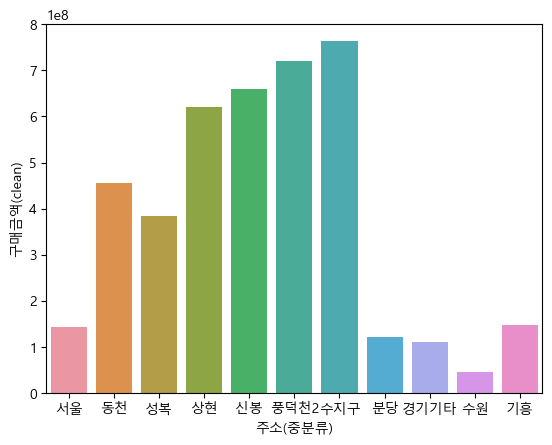

In [113]:
# 매출액 계산
# 구매력이 큰 지역: 풍덕천
# 우리 매장에 주는 매출액의 규모
sns.barplot(data=df1, x="주소(중분류)", y="구매금액(clean)", estimator="sum", errorbar=None)

<Axes: xlabel='주소(중분류)', ylabel='구매금액(clean)'>

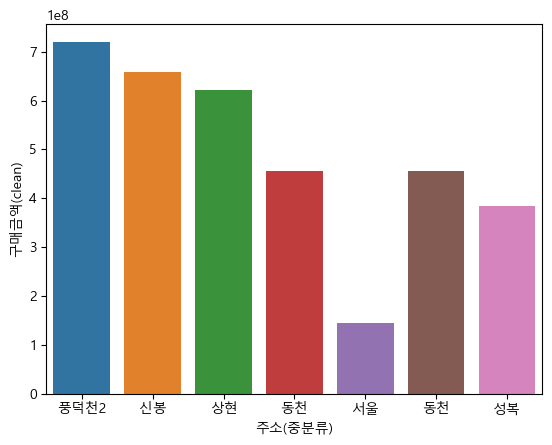

In [117]:
# 구매력이 큰 순서대로 시각화: order에 꼭 df1["주소(중분류)"].unique()가 모두 들어가야 할 필요는 없다. 
sns.barplot(data=df1, x="주소(중분류)", y="구매금액(clean)", estimator="sum", errorbar=None,
           order=['풍덕천2', '신봉', '상현', '동천','서울', '동천', '성복'])

<Axes: xlabel='연령(clean)', ylabel='구매금액(clean)'>

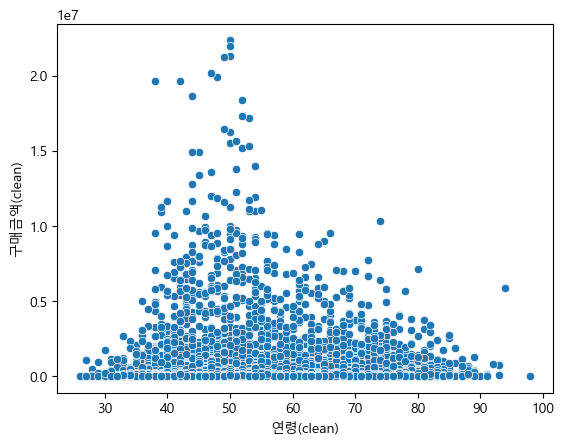

In [119]:
# 연령대-구매금액(clean): 데이터 분포 확인
sns.scatterplot(data=df1, x="연령(clean)", y="구매금액(clean)")

<Axes: xlabel='연령대', ylabel='구매금액(clean)'>

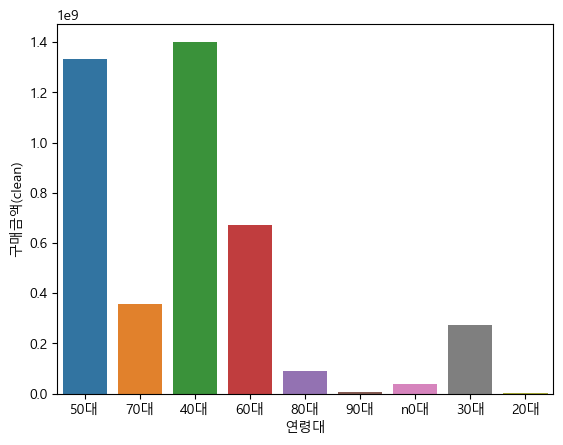

In [121]:
# 연령대 파생변수를 생성했기 때문에, 다음과 같이 시각화를 할 수 있다. 
sns.barplot(data=df1, x="연령대", y="구매금액(clean)", estimator="sum", errorbar=None)
# 숫자-숫자 데이터 분포 확인했을 때와, 문자-숫자 데이터 분포 확인했을 때와 다른 결과가 나왔다. 
# 숫자-숫자 데이터 분포로는 4-50대 고객들이 구매력이 크다 정도만 보이는 반면, 
# 문자-숫자 데이터 분포는 정확히 어느 연령대가 우리 매장 매출액에 가장 많이 기여하는지 정확하게 보인다. 
# 이런식으로 데이터 타입을 변환해서 데이터를 분석하면, 더 다양한 insight를 얻을 수 있다. 

# apply 사용해서
# 숫자 -> 문자
# 문자 -> 문자
# 이렇게 하려면 python 베이스가 탄탄해야 한다.

# 실무에서
# 문자열 데이터 처리, 
# if 문
# 이 많이 쓰인다. 

In [123]:
df1.columns

Index(['Unnamed: 0', '회원번호', '회원상태', '성별', '결혼유무', '주소', '생년', '구매금액(clean)',
       '구매수량(clean)', '총방문횟수', '간식(%)', '건강(%)', '과실(%)', '생활용품(%)', '서류(%)',
       '수산(%)', '양념/가루(%)', '음료(%)', '잡곡(%)', '주곡(%)', '채소(%)', '축산물(%)',
       '1회방문시평균구매금액', '주소(apply1)', '연령', '연령(clean)', '연령대', '주소(중분류)'],
      dtype='object')

<Axes: xlabel='연령대', ylabel='축산물(%)'>

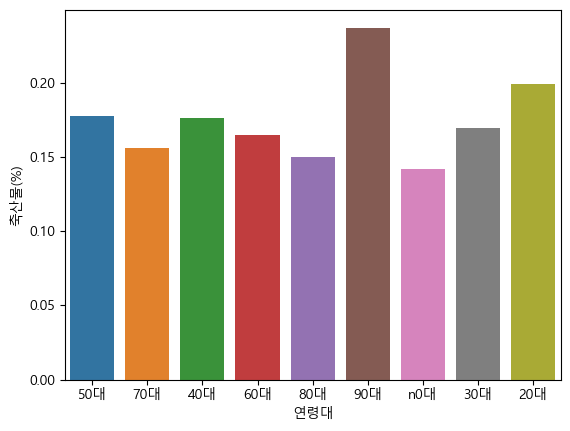

In [124]:
# 축산물만 보자. 
# 이것은 평균으로 계산해야 한다. 
# 축산물은 90대, 20대가 가장 많이 산다. 
sns.barplot(data=df1, x="연령대", y="축산물(%)", estimator="mean", errorbar=None)

<Axes: xlabel='연령대', ylabel='간식(%)'>

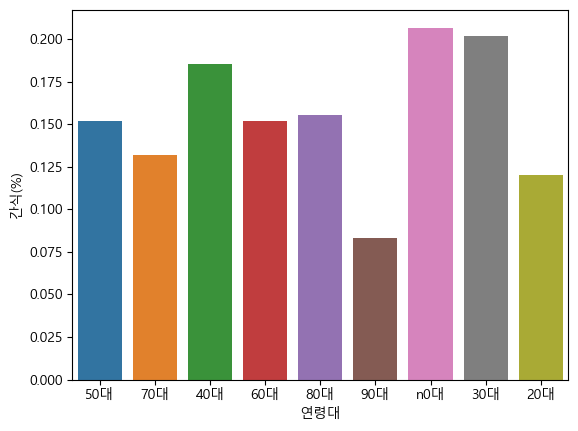

In [125]:
# 간식
sns.barplot(data=df1, x="연령대", y="간식(%)", estimator="mean", errorbar=None)

In [ ]:
# 이런 식으로 파생변수를 만들어서 데이터를 분석하면 
# 같은 데이터로부터 더 많은 insight를 얻을 수 있다. 

In [126]:
# 이런 그림자료들을 활용해서, 데이터를 입체적으로 분석할 수 있다. 

In [127]:
# 데이터 분석은 시각화에서 끝나면 안된다. 
# 원래 통계적 가설 검정이라는 단계를 거쳐서, 
# 이 연령대 간의 유의미한 차이가 있냐 없냐를
# 객관적으로 규명해주는 작업이 필요하다. 

# 이를 하려면 통계학을 깊게 공부해야 한다. 

In [128]:
# apply 기능은 연습이 많이 필요하다. 
# 현재 업무를 보고 있다면
# 현재 업무에서 보고 있는 데이터로, 
# 데이터를 다양하게 처리하는 연습을 해보라. 

# 취준생이라면
# 제공된 실습 데이터로 
# 개인 프로젝트를 해보라. 
# 또는 클래스에서 배운 내용을 다른 데이터에 적용해보는 연습을해볼 것을 추천한다. 

# 데이터를 어떻게 다루고 처리하고 분석할 것인가? 

Mission
데이터를 이용해 계산한 '구매금액(clean)'을, 성별과 연령대에 따라 평균,합,표준편차를 계산하여, 데이터 파일형태로 저장해 보세요!

In [189]:
import pandas as pd
pd.options.display.float_format = "{:.2f}".format
import numpy as np


df1 = pd.read_csv("dataset/store_member_total_1.csv")
df1["연령"] = 2023 - df1["생년"]
#df1["연령(clean)"].describe()
cond1 = (df1["연령"] > 0)
cond2 = (df1["연령"] < 100)
df1.loc[cond1&cond2, "연령(clean)"] = df1["연령"]
df1.loc[~cond1&cond2, "연령(clean)"] = np.nan
#df1["연령(clean)"].describe()

def func1(row):
    result = str(row)
    return result[0] + "0대"

df1["연령대"] = df1["연령(clean)"].apply(func1)
df2 = df1[["연령대", "성별", "구매금액(clean)"]]
#help(pd.DataFrame.pivot_table)
df3 = df2.pivot_table(index=["성별", "연령대"], values="구매금액(clean)", aggfunc=[np.mean, np.sum, np.std])
df3.to_excel("submission.xlsx", float_format="%.2f")
#pd.read_excel("submission.xlsx")

,Unnamed: 0,Unnamed: 1,mean,sum,std
0,NaN,NaN,구매금액(clean),구매금액(clean),구매금액(clean)
1,성별,연령대,NaN,NaN,NaN
2,남,20대,3550,7100,5020.46
3,NaN,30대,171192.76,4964590,280883.69
4,NaN,40대,597710.43,93242827,1705581.34
5,NaN,50대,460705.39,70027220,752745.25
6,NaN,60대,419173.68,31857200,604852.54
7,NaN,70대,574764.26,31037270,1073582.76
8,NaN,80대,314276.14,13828150,357990.69
9,NaN,90대,157333.33,472000,107092.98
